<a href="https://colab.research.google.com/github/sgbharti22/Calories-burnt-Prediction/blob/main/Burning__Calories_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries


In [42]:
import pandas as pd   #used to make a data frame which is easy for processing the data
import numpy as np   #numpy is the library which is used to you know make arrays so arrays
import matplotlib.pyplot as plt   #to plots for the basic visualization
import seaborn as sb # for visualizing the dataset

Importing the dataset of Calories Burnt

In [43]:
calories=pd.read_csv("calories.csv")


In [44]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Importing the dataset of Individuals Workout

In [45]:
exercise=pd.read_csv("exercise.csv")

In [46]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining 2 dataframes

In [47]:
dataset=pd.concat([exercise,calories["Calories"]] ,axis=1)

In [48]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [50]:
# describing about the features
dataset.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [51]:
dataset.isnull()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False


In [52]:
dataset.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Visualization

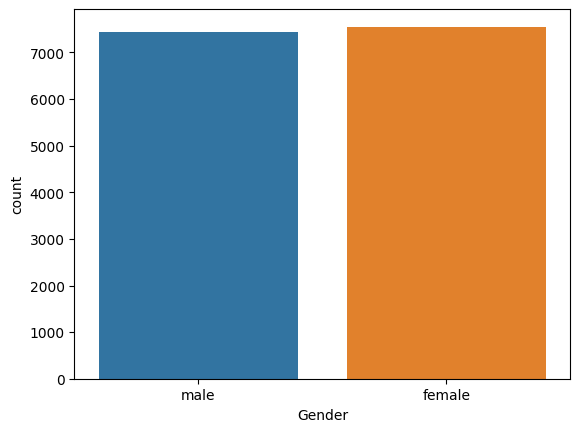

In [53]:
sb.countplot(x="Gender", data=dataset);

<ipython-input-54-27a86a975771>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Age"])


<Axes: xlabel='Age', ylabel='Density'>

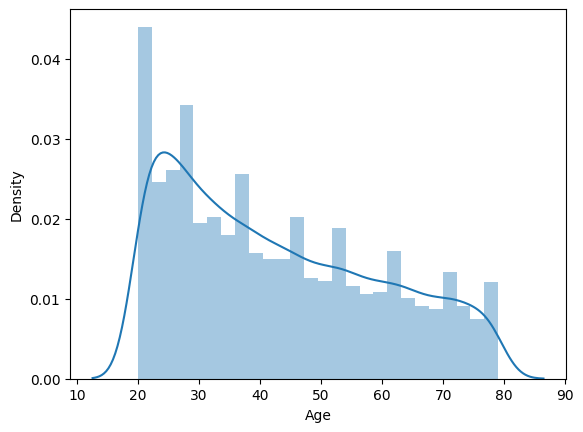

In [54]:
sb.distplot(dataset["Age"])

<ipython-input-55-e5e86f2a1a29>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Weight"])


<Axes: xlabel='Weight', ylabel='Density'>

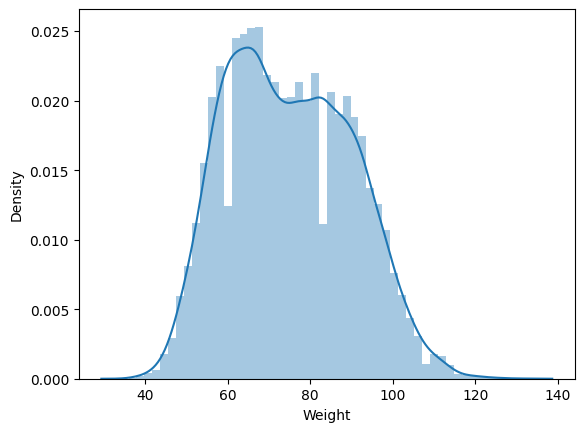

In [55]:
sb.distplot(dataset["Weight"])

<ipython-input-56-f81f45cd9e22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Height"])


<Axes: xlabel='Height', ylabel='Density'>

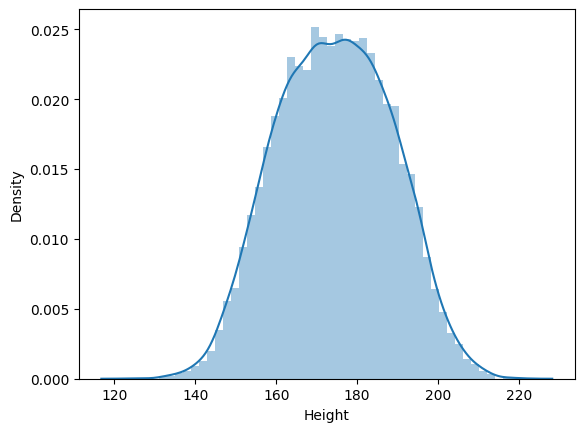

In [56]:
sb.distplot(dataset["Height"])

<ipython-input-57-980f30d96d75>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Duration"])


<Axes: xlabel='Duration', ylabel='Density'>

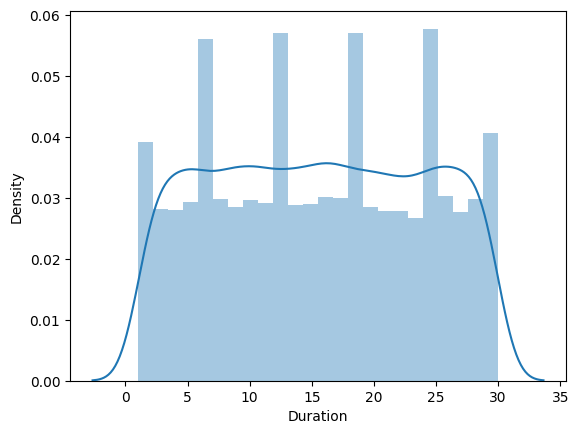

In [57]:

sb.distplot(dataset["Duration"])

<ipython-input-58-35fb508920c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Heart_Rate"])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

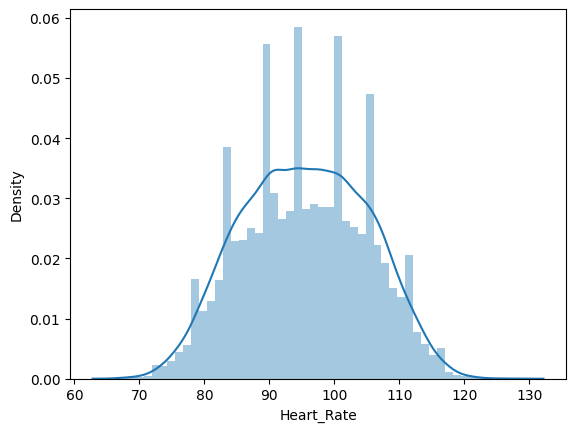

In [58]:
sb.distplot(dataset["Heart_Rate"])

<ipython-input-59-c59b7ca5e5e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Body_Temp"])


<Axes: xlabel='Body_Temp', ylabel='Density'>

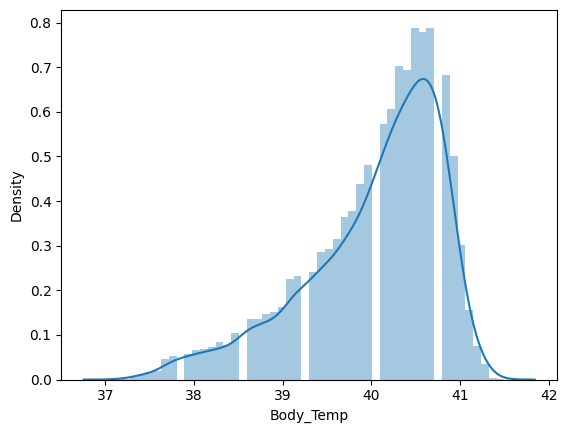

In [59]:
sb.distplot(dataset["Body_Temp"])

<ipython-input-60-ca9d1d8d472e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(dataset["Calories"])


<Axes: xlabel='Calories', ylabel='Density'>

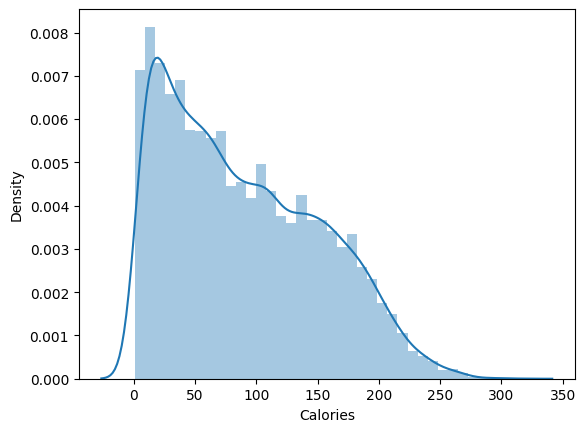

In [60]:
sb.distplot(dataset["Calories"])

<ipython-input-61-a3d74bf2e88e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=dataset.corr()


<Axes: >

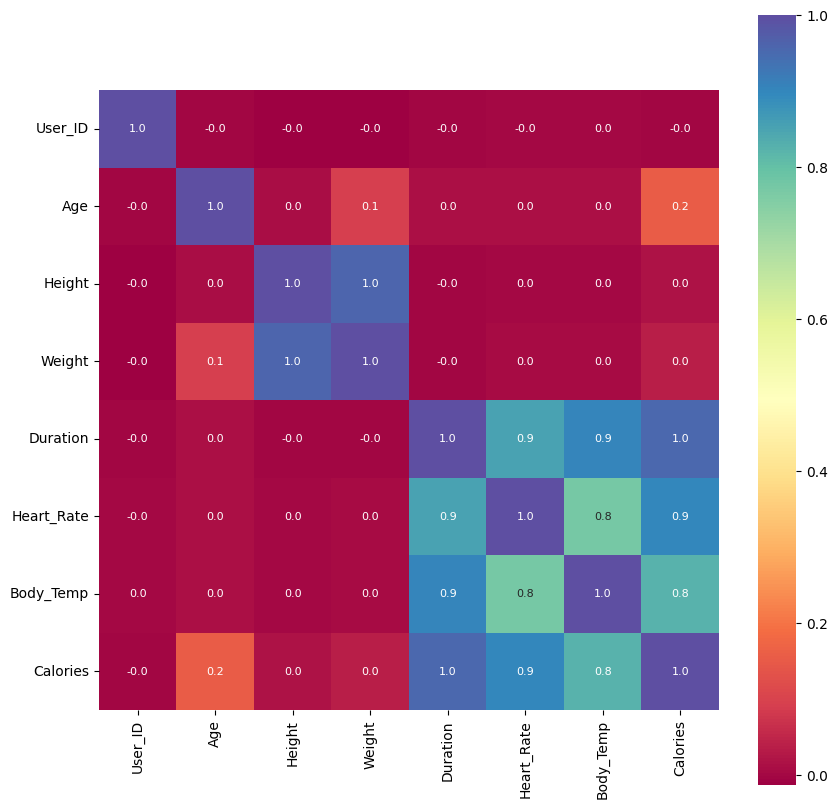

In [61]:
correl=dataset.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correl, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Spectral')

In [62]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Independent features

In [63]:
X=dataset.iloc[:,1:-1].values
print(X)


[['male' 68 190.0 ... 29.0 105.0 40.8]
 ['female' 20 166.0 ... 14.0 94.0 40.3]
 ['male' 69 179.0 ... 5.0 88.0 38.7]
 ...
 ['female' 43 159.0 ... 16.0 90.0 40.1]
 ['male' 78 193.0 ... 2.0 84.0 38.3]
 ['male' 63 173.0 ... 18.0 92.0 40.5]]


Dependent features

In [64]:
Y=dataset.iloc[:,-1].values
print(Y)

[231.  66.  26. ...  75.  11.  98.]


Preprocessing DataSet: One HotEncoding

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 1.0 68 ... 29.0 105.0 40.8]
 [1.0 0.0 20 ... 14.0 94.0 40.3]
 [0.0 1.0 69 ... 5.0 88.0 38.7]
 ...
 [1.0 0.0 43 ... 16.0 90.0 40.1]
 [0.0 1.0 78 ... 2.0 84.0 38.3]
 [0.0 1.0 63 ... 18.0 92.0 40.5]]


Splitting DataSet into Train and Test Set

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


Applying Model: XGBoost Regressor

In [68]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
Y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[ 39.76  43.  ]
 [ 15.44  15.  ]
 [101.12 101.  ]
 ...
 [ 27.88  29.  ]
 [147.57 150.  ]
 [158.5  157.  ]]


In [70]:
dataset.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [71]:
print(model.predict([[0, 1, 68, 190, 94, 29, 105, 40.8]]))

[230.44]


In [72]:
dataset.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


Predicting with New Data

In [73]:
print(model.predict([[1, 0, 27,165,65,6,85,41]]))

[22.54]


Measuring Accuracy of the Model

In [74]:
from sklearn import metrics
mea=metrics.mean_absolute_error(Y_test,Y_pred)
print("Mean Absolute Error: ",mea)

Mean Absolute Error:  1.511337571144104


In [75]:
r2_val=metrics.r2_score(Y_test, Y_pred)
print("R^2 Value: ",r2_val)

R^2 Value:  0.998801753229742


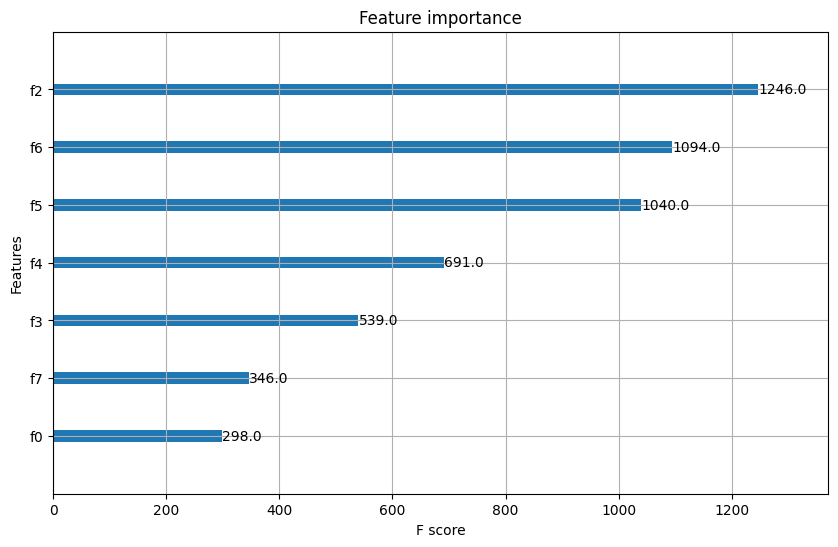

In [76]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,6))
plot_importance(model, ax=ax)
plt.show()